In [1]:
import warnings

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

warnings.simplefilter("ignore", UserWarning)

import pandas as pd

In [2]:
# datasets = ["embryo1-2","embryo1-5","embryo2-2","embryo2-5","embryo3-2","embryo3-5"]
datasets = ["embryo2-2","embryo2-5"]
input_dir = 'G:/dataset/07-seqFish-SpatialMouseAtlas/output/python/'  # Replace it with your file path
output_dir = 'G:/dataset/07-seqFish-SpatialMouseAtlas/output/moscot/'  # Replace it with your file path
expriment_name = 'embryo2'

In [3]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()
    
    matrix = pd.read_csv(input_dir + dataset + "/matrix.csv", index_col=False)
    feature = pd.read_csv(input_dir + dataset + "/features.csv", index_col=0)
    feature.index.name = 'gene'
    barcode = pd.read_csv(input_dir + dataset + "/barcodes.csv", index_col=0)
    barcode.index.name = 'spot'
    adata = ad.AnnData(X=matrix.to_numpy().T, obs=barcode, var=feature)
    
    positions = pd.read_csv(input_dir + dataset + "/tissue_positions_list.csv", index_col=0, header=None)
    positions.drop(positions.columns[[0, 3, 4]], axis=1, inplace=True)
    positions.columns = ['x', 'y']
    adata.obsm['spatial'] = positions.values
    
    adata_label = pd.read_csv(input_dir + dataset + '/truth.csv', index_col=0)
    # adata_label.index = [str.replace(str.replace(x, '.', '-'), adata_label['batch'][0] + '-', '') for x in adata_label.index]
    adata.obs['batch'] = adata_label['batch']
    adata.obs['ground.truth'] = adata_label['celltype_mapped_refined']
    adata_list.append(adata)


# for dataset in datasets:
#     adata = sc.read_visium(input_dir + dataset)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(input_dir + dataset + '/' + 'truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['ground.truth'] = adata_label['celltype']
#     adata_list.append(adata)

print(adata_list)
adata = ad.concat(adata_list, label="slice_name", keys=datasets)
# adata =sc.AnnData.concatenate(adata_list[0],adata_list[1],adata_list[2],adata_list[3])
print(adata)
del adata_list

[AnnData object with n_obs × n_vars = 8011 × 351
    obs: 'batch', 'ground.truth'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 6880 × 351
    obs: 'batch', 'ground.truth'
    obsm: 'spatial']
AnnData object with n_obs × n_vars = 14891 × 351
    obs: 'batch', 'ground.truth', 'slice_name'
    obsm: 'spatial'


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):


In [4]:
# adata = datasets.sim_align()
adata.obs['slice_name']

spot
embryo2_Pos29_cell10_z2     embryo2-2
embryo2_Pos29_cell100_z2    embryo2-2
embryo2_Pos29_cell101_z2    embryo2-2
embryo2_Pos29_cell103_z2    embryo2-2
embryo2_Pos29_cell104_z2    embryo2-2
                              ...    
embryo2_Pos50_cell95_z5     embryo2-5
embryo2_Pos50_cell96_z5     embryo2-5
embryo2_Pos50_cell97_z5     embryo2-5
embryo2_Pos50_cell98_z5     embryo2-5
embryo2_Pos50_cell99_z5     embryo2-5
Name: slice_name, Length: 14891, dtype: category
Categories (2, object): ['embryo2-2', 'embryo2-5']

D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

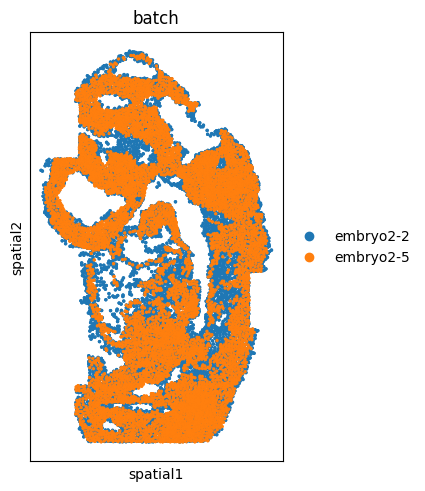

In [5]:
sq.pl.spatial_scatter(adata, shape=None, library_id="batch", color="batch")

In [6]:
%%time

ap = AlignmentProblem(adata=adata)
ap = ap.prepare(batch_key="batch", policy="sequential")

ap = ap.solve()

INFO     Ordering Index(['embryo2_Pos29_cell10_z2', 'embryo2_Pos29_cell100_z2',                                    
                'embryo2_Pos29_cell101_z2', 'embryo2_Pos29_cell103_z2',                                            
                'embryo2_Pos29_cell104_z2', 'embryo2_Pos29_cell105_z2',                                            
                'embryo2_Pos29_cell106_z2', 'embryo2_Pos29_cell108_z2',                                            
                'embryo2_Pos29_cell109_z2', 'embryo2_Pos29_cell11_z2',                                             
                ...                                                                                                
                'embryo2_Pos50_cell90_z5', 'embryo2_Pos50_cell91_z5',                                              
                'embryo2_Pos50_cell92_z5', 'embryo2_Pos50_cell93_z5',                                              
                'embryo2_Pos50_cell94_z5', 'embryo2_Pos50_cell95_z5',   

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(8011, 6880)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


CPU times: total: 1h 23min 51s
Wall time: 24min 38s


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 14891 × 351
    obs: 'batch', 'ground.truth', 'slice_name'
    uns: 'batch_colors'
    obsm: 'spatial', 'spatial_warp_sequential'


D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

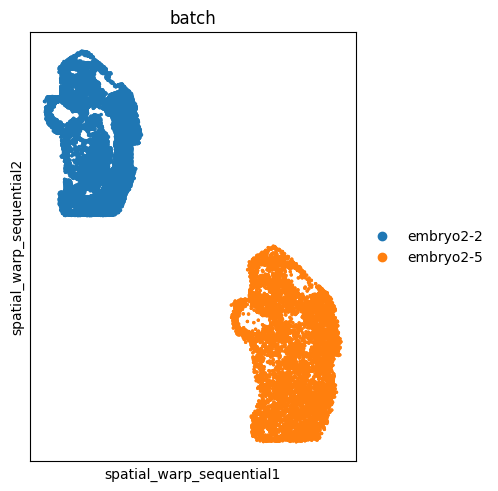

In [8]:
ap.align(reference=datasets[0], mode="warp", spatial_key="spatial", key_added="spatial_warp_sequential")
print(adata)

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_warp_sequential", library_id="batch", color="batch"
)

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is depre

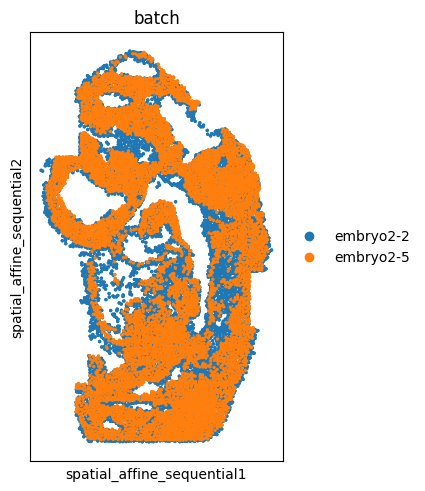

In [9]:
ap.align(reference=datasets[0], mode="affine", spatial_key="spatial", key_added="spatial_affine_sequential")

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_affine_sequential", library_id="batch", color="batch"
)

In [ ]:
# %%time

# ap_star = AlignmentProblem(adata=adata)
# ap_star = ap_star.prepare(batch_key="batch", policy="star", reference="0")

# ap_star = ap_star.solve()

In [ ]:
# ap_star.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_star")
# print(adata)

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_warp_star", library_id="batch", color="batch"
# )

In [ ]:
# ap_star.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_star")

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_affine_star", library_id="batch", color="batch"
# )

In [10]:
adata

AnnData object with n_obs × n_vars = 14891 × 351
    obs: 'batch', 'ground.truth', 'slice_name'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'

In [2]:
import scanpy as sc
import pandas as pd
adata = sc.read_h5ad(r'G:\dataset\08-STARmap\output\moscot\moscot_STARmap.h5ad')
output_dir = r'G:/dataset/08-STARmap/output/moscot/'
expriment_name = 'moscot'

In [3]:
df = pd.DataFrame(adata.obsm['spatial_warp_sequential'], index= adata.obs_names.tolist(), columns=['aligned_x', 'aligned_y'])
df.to_csv(output_dir+expriment_name+'_warp.csv')

df = pd.DataFrame(adata.obsm['spatial_affine_sequential'], index= adata.obs_names.tolist(), columns=['aligned_x', 'aligned_y'])
df.to_csv(output_dir+expriment_name+'_affine.csv')

In [12]:
print(adata.isbacked)
adata.filename = output_dir + 'moscot_' + expriment_name + '.h5ad'
print(adata.isbacked)

False
True
